### Importing Libraries

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np

#### use GPU

In [4]:
# Define device to use GPU if available
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Define Hyperparameters

In [5]:
batch_size = 128
latent_dim = 100
lr = 0.0002
num_epochs = 100

### Data transformation to normalize the images

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize the images to [-1, 1] range
])

### Load the MNIST dataset

In [7]:
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:00<00:00, 57821540.32it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 1756226.08it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:00<00:00, 13720073.95it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 4335577.78it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### Define the Generator

In [8]:
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(True),
            nn.Linear(256, 512),
            nn.ReLU(True),
            nn.Linear(512, 1024),
            nn.ReLU(True),
            nn.Linear(1024, 28 * 28),
            nn.Tanh()  # Output layer with Tanh to get values in [-1, 1]
        )

    def forward(self, z):
        img = self.model(z)
        img = img.view(img.size(0), 1, 28, 28)  # Reshape output to image dimensions
        return img

### Discriminator Network

In [9]:
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(28 * 28, 1024),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(1024, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.3),
            nn.Linear(256, 1),
            nn.Sigmoid()  # Output layer with Sigmoid for binary classification
        )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)  # Flatten the input image
        validity = self.model(img_flat)
        return validity

### Initialize generator and discriminator

In [10]:
generator = Generator(latent_dim).to(device)
discriminator = Discriminator().to(device)

### Loss function

In [11]:
adversarial_loss = nn.BCELoss()

### Define Optimizers

In [12]:
optimizer_G = optim.Adam(generator.parameters(), lr=lr)
optimizer_D = optim.Adam(discriminator.parameters(), lr=lr)

### Generate Images

In [13]:
def generate_and_save_images(generator, epoch, latent_dim, num_images=100):
    # Generate random latent vectors
    z = torch.randn(num_images, latent_dim, device=device)
    gen_imgs = generator(z).detach().cpu().numpy()  # Detach and move to CPU for visualization

    # Create a figure for the grid of images with no spacing
    fig, axs = plt.subplots(10, 10, figsize=(10, 10),
                            gridspec_kw={'wspace': 0, 'hspace': 0})  # Remove spacing between subplots
    cnt = 0

    for i in range(10):
        for j in range(10):
            # Display the generated image
            axs[i, j].imshow(gen_imgs[cnt, 0, :, :], cmap='gray')
            axs[i, j].axis('off')  # Turn off axis labels
            cnt += 1

    plt.subplots_adjust(wspace=0, hspace=0)  # Further adjust to ensure no space
    plt.show()  # Display the figure

### Training the GAN

Epoch [0/100] - Discriminator Accuracy: 0.5849


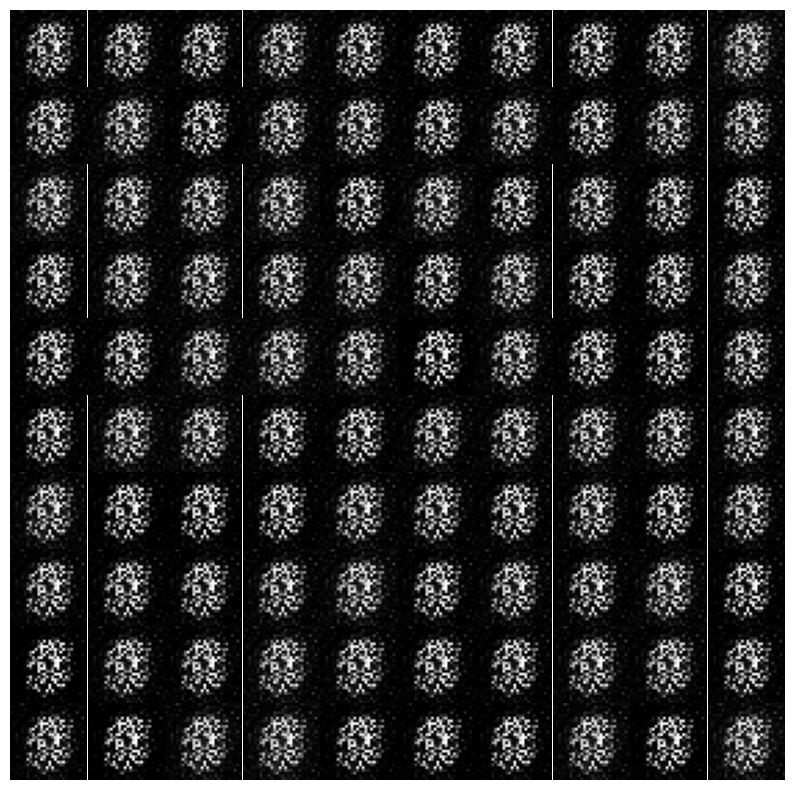

Epoch [1/100] - Discriminator Accuracy: 0.6495
Epoch [2/100] - Discriminator Accuracy: 0.5921
Epoch [3/100] - Discriminator Accuracy: 0.5017
Epoch [4/100] - Discriminator Accuracy: 0.5021
Epoch [5/100] - Discriminator Accuracy: 0.5091
Epoch [6/100] - Discriminator Accuracy: 0.5022
Epoch [7/100] - Discriminator Accuracy: 0.5049
Epoch [8/100] - Discriminator Accuracy: 0.5058
Epoch [9/100] - Discriminator Accuracy: 0.5102
Epoch [10/100] - Discriminator Accuracy: 0.5064


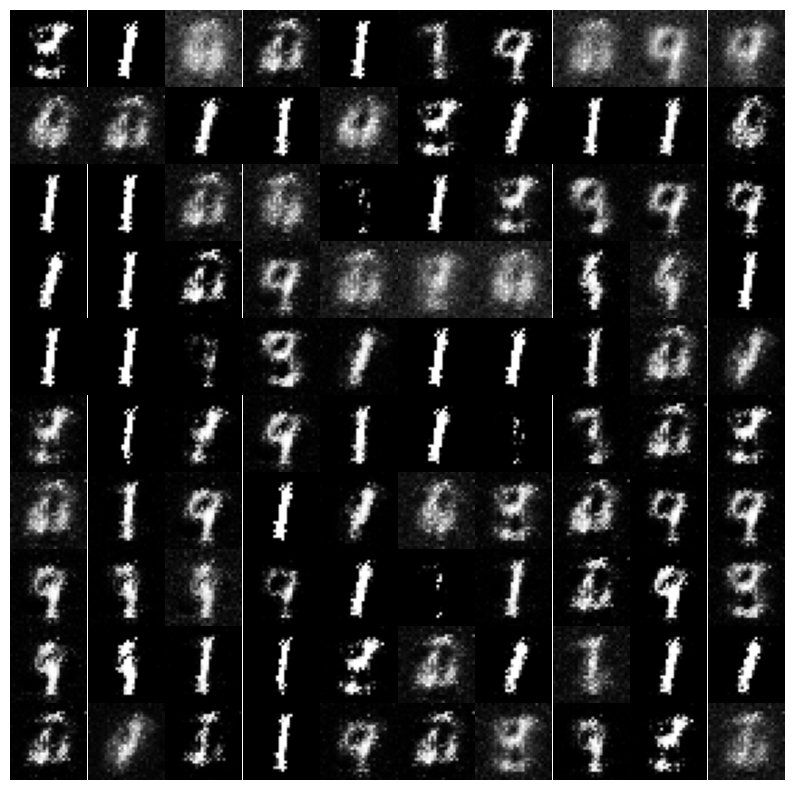

Epoch [11/100] - Discriminator Accuracy: 0.5077
Epoch [12/100] - Discriminator Accuracy: 0.5043
Epoch [13/100] - Discriminator Accuracy: 0.5047
Epoch [14/100] - Discriminator Accuracy: 0.5081
Epoch [15/100] - Discriminator Accuracy: 0.5130
Epoch [16/100] - Discriminator Accuracy: 0.5136
Epoch [17/100] - Discriminator Accuracy: 0.5112
Epoch [18/100] - Discriminator Accuracy: 0.5093
Epoch [19/100] - Discriminator Accuracy: 0.5147
Epoch [20/100] - Discriminator Accuracy: 0.5160


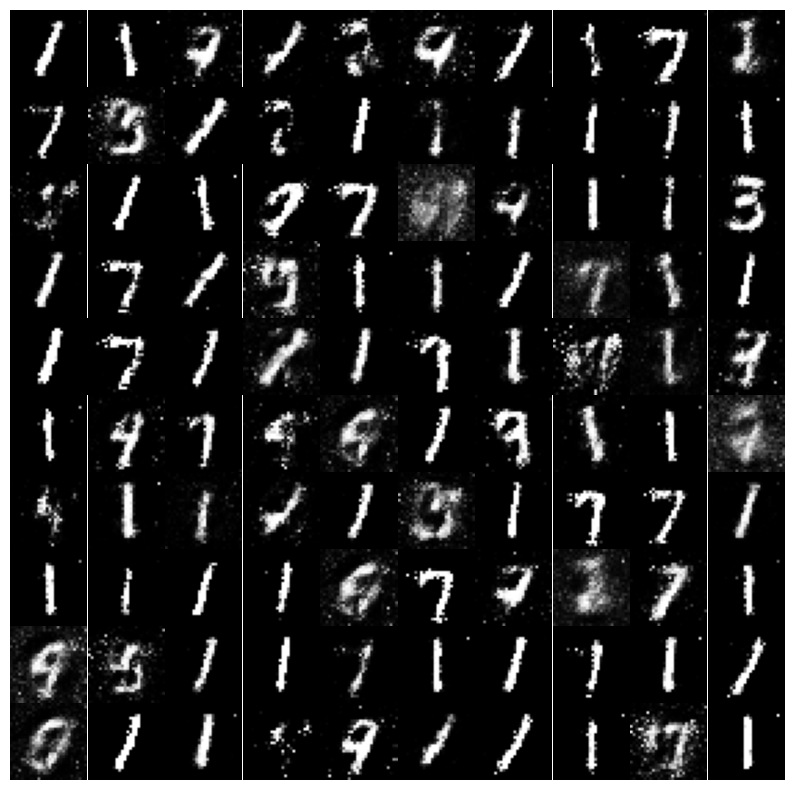

Epoch [21/100] - Discriminator Accuracy: 0.5174
Epoch [22/100] - Discriminator Accuracy: 0.5171
Epoch [23/100] - Discriminator Accuracy: 0.5251
Epoch [24/100] - Discriminator Accuracy: 0.5273
Epoch [25/100] - Discriminator Accuracy: 0.5214
Epoch [26/100] - Discriminator Accuracy: 0.5166
Epoch [27/100] - Discriminator Accuracy: 0.5256
Epoch [28/100] - Discriminator Accuracy: 0.5289
Epoch [29/100] - Discriminator Accuracy: 0.5320
Epoch [30/100] - Discriminator Accuracy: 0.5344


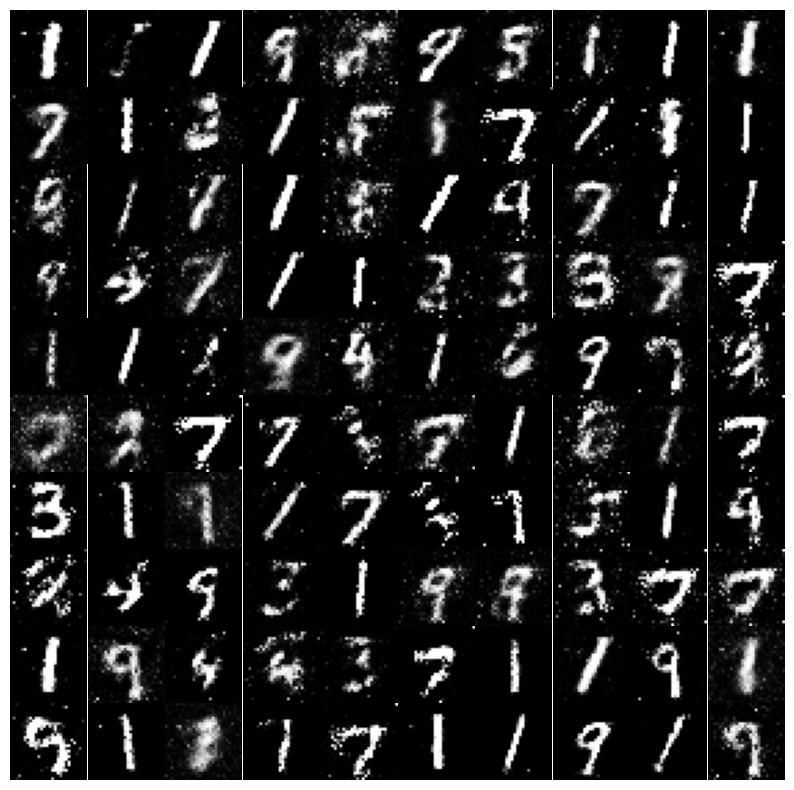

Epoch [31/100] - Discriminator Accuracy: 0.5280
Epoch [32/100] - Discriminator Accuracy: 0.5291
Epoch [33/100] - Discriminator Accuracy: 0.5280
Epoch [34/100] - Discriminator Accuracy: 0.5256
Epoch [35/100] - Discriminator Accuracy: 0.5286
Epoch [36/100] - Discriminator Accuracy: 0.5351
Epoch [37/100] - Discriminator Accuracy: 0.5409
Epoch [38/100] - Discriminator Accuracy: 0.5352
Epoch [39/100] - Discriminator Accuracy: 0.5452
Epoch [40/100] - Discriminator Accuracy: 0.5485


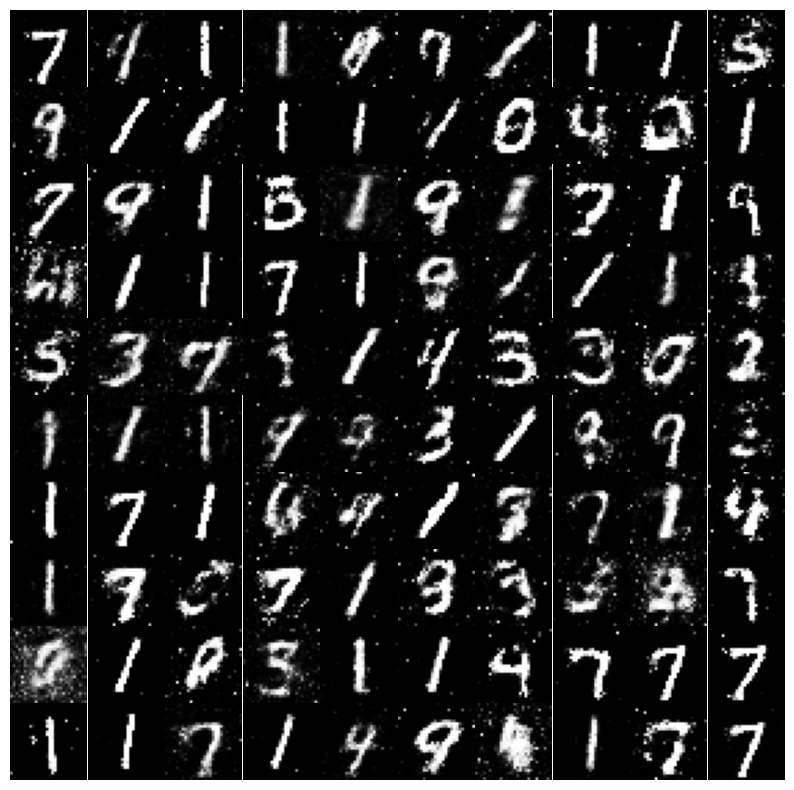

Epoch [41/100] - Discriminator Accuracy: 0.5577
Epoch [42/100] - Discriminator Accuracy: 0.5620
Epoch [43/100] - Discriminator Accuracy: 0.5640
Epoch [44/100] - Discriminator Accuracy: 0.5690
Epoch [45/100] - Discriminator Accuracy: 0.5675
Epoch [46/100] - Discriminator Accuracy: 0.5712
Epoch [47/100] - Discriminator Accuracy: 0.5738
Epoch [48/100] - Discriminator Accuracy: 0.5760
Epoch [49/100] - Discriminator Accuracy: 0.5724
Epoch [50/100] - Discriminator Accuracy: 0.5841


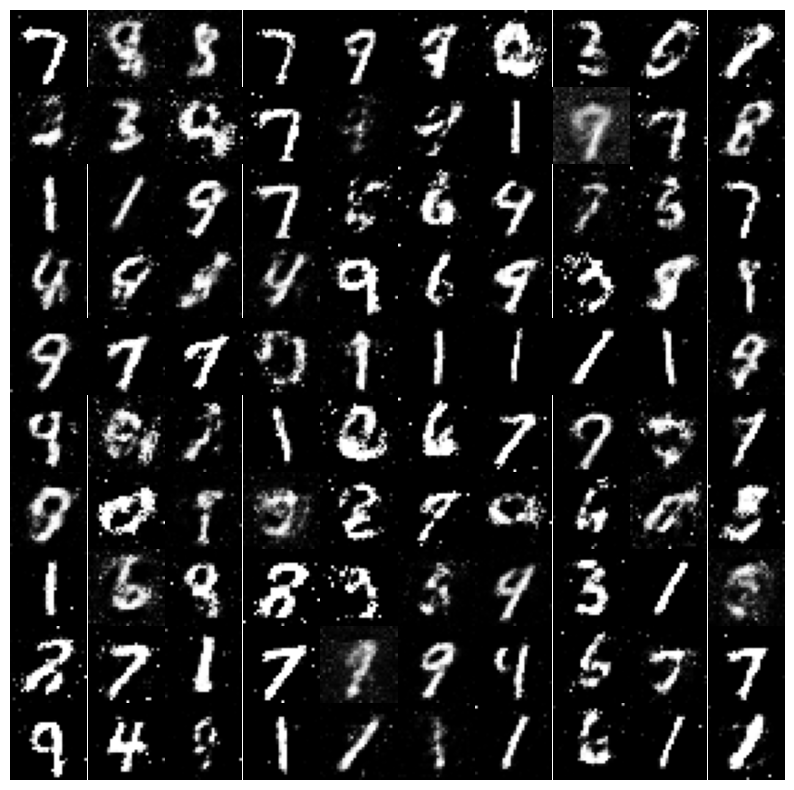

Epoch [51/100] - Discriminator Accuracy: 0.5851
Epoch [52/100] - Discriminator Accuracy: 0.5943
Epoch [53/100] - Discriminator Accuracy: 0.5900
Epoch [54/100] - Discriminator Accuracy: 0.5926
Epoch [55/100] - Discriminator Accuracy: 0.6050
Epoch [56/100] - Discriminator Accuracy: 0.6090
Epoch [57/100] - Discriminator Accuracy: 0.6100
Epoch [58/100] - Discriminator Accuracy: 0.6230
Epoch [59/100] - Discriminator Accuracy: 0.6190
Epoch [60/100] - Discriminator Accuracy: 0.6221


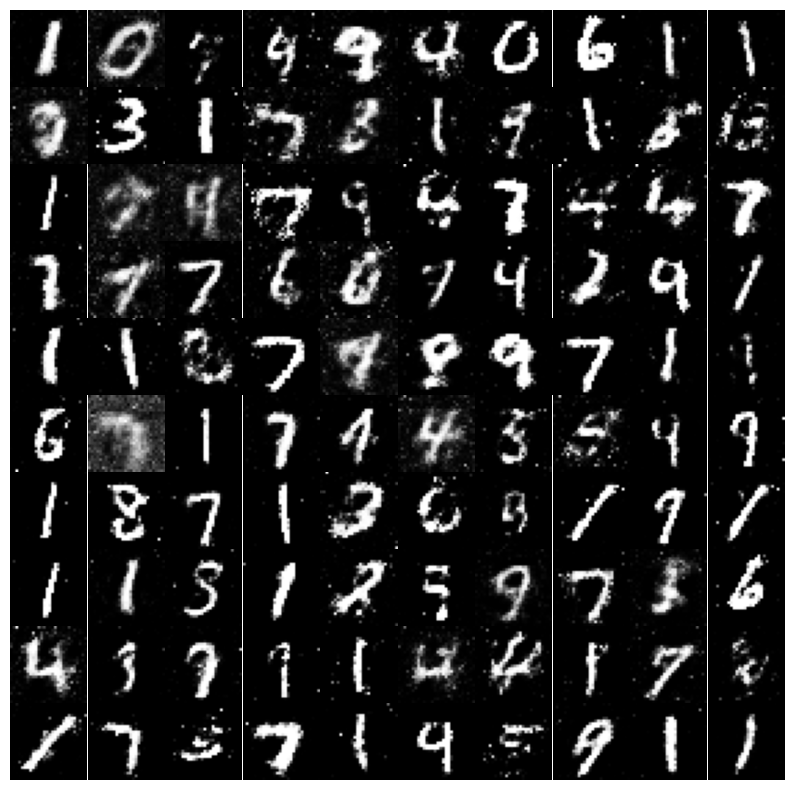

Epoch [61/100] - Discriminator Accuracy: 0.6301
Epoch [62/100] - Discriminator Accuracy: 0.6226
Epoch [63/100] - Discriminator Accuracy: 0.6277
Epoch [64/100] - Discriminator Accuracy: 0.6328
Epoch [65/100] - Discriminator Accuracy: 0.6299
Epoch [66/100] - Discriminator Accuracy: 0.6300
Epoch [67/100] - Discriminator Accuracy: 0.6405
Epoch [68/100] - Discriminator Accuracy: 0.6377
Epoch [69/100] - Discriminator Accuracy: 0.6415
Epoch [70/100] - Discriminator Accuracy: 0.6426


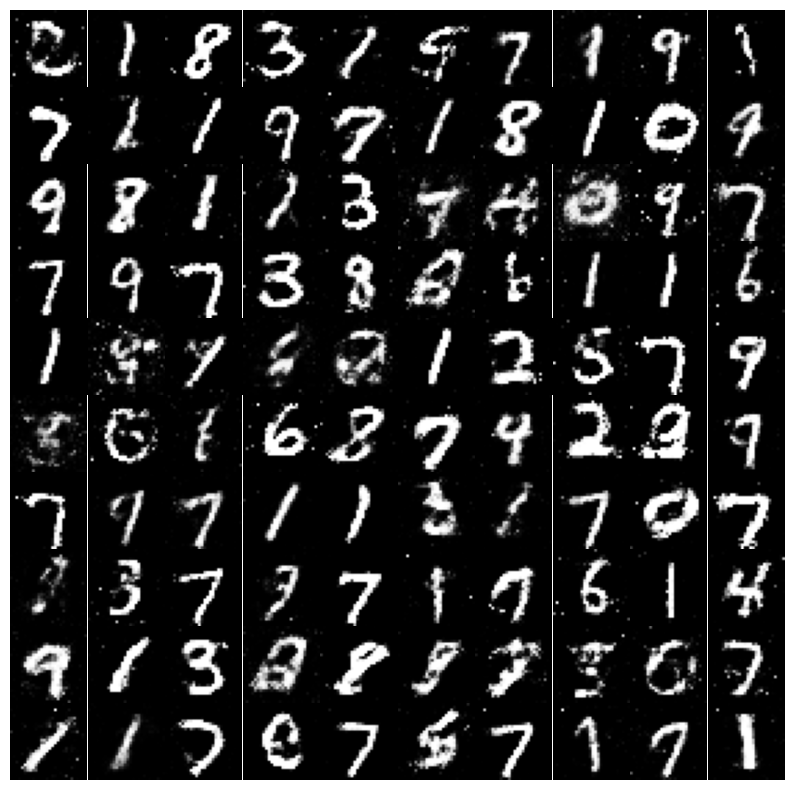

Epoch [71/100] - Discriminator Accuracy: 0.6489
Epoch [72/100] - Discriminator Accuracy: 0.6489
Epoch [73/100] - Discriminator Accuracy: 0.6475
Epoch [74/100] - Discriminator Accuracy: 0.6617
Epoch [75/100] - Discriminator Accuracy: 0.6703
Epoch [76/100] - Discriminator Accuracy: 0.6629
Epoch [77/100] - Discriminator Accuracy: 0.6606
Epoch [78/100] - Discriminator Accuracy: 0.6608
Epoch [79/100] - Discriminator Accuracy: 0.6652
Epoch [80/100] - Discriminator Accuracy: 0.6706


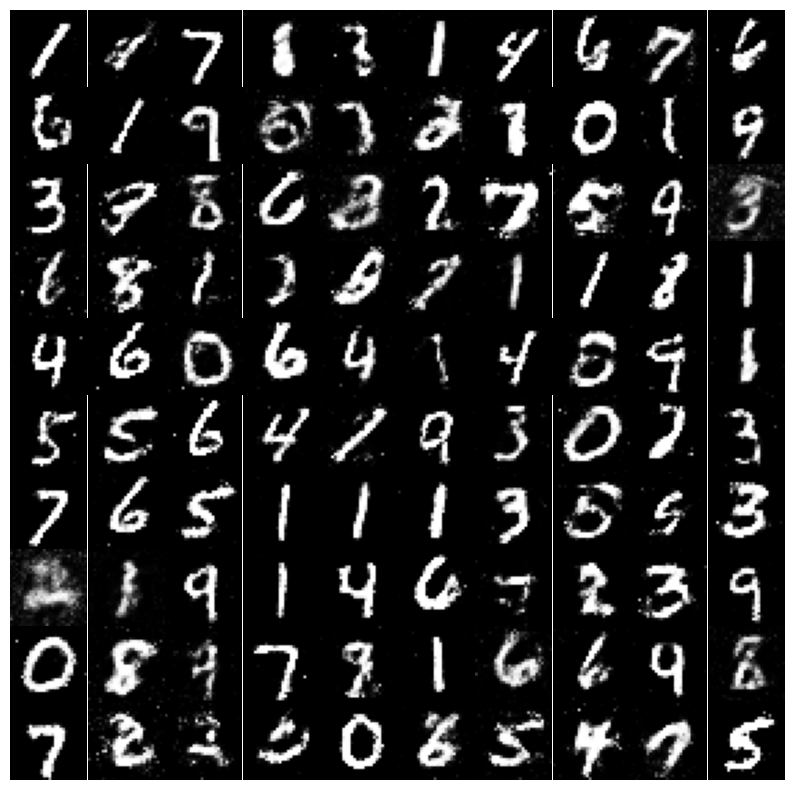

Epoch [81/100] - Discriminator Accuracy: 0.6741
Epoch [82/100] - Discriminator Accuracy: 0.6687
Epoch [83/100] - Discriminator Accuracy: 0.6702
Epoch [84/100] - Discriminator Accuracy: 0.6705
Epoch [85/100] - Discriminator Accuracy: 0.6649
Epoch [86/100] - Discriminator Accuracy: 0.6738
Epoch [87/100] - Discriminator Accuracy: 0.6826
Epoch [88/100] - Discriminator Accuracy: 0.6770
Epoch [89/100] - Discriminator Accuracy: 0.6787
Epoch [90/100] - Discriminator Accuracy: 0.6822


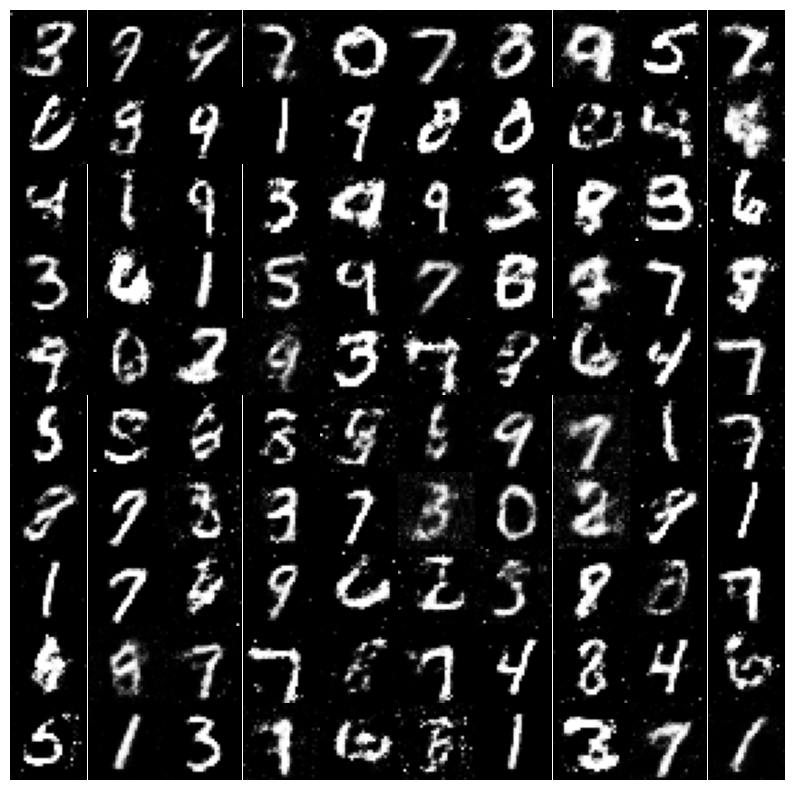

Epoch [91/100] - Discriminator Accuracy: 0.6852
Epoch [92/100] - Discriminator Accuracy: 0.6830
Epoch [93/100] - Discriminator Accuracy: 0.6862
Epoch [94/100] - Discriminator Accuracy: 0.6899
Epoch [95/100] - Discriminator Accuracy: 0.6912
Epoch [96/100] - Discriminator Accuracy: 0.6885
Epoch [97/100] - Discriminator Accuracy: 0.6953
Epoch [98/100] - Discriminator Accuracy: 0.6998
Epoch [99/100] - Discriminator Accuracy: 0.7045
Epoch [100/100] - Discriminator Accuracy: 0.6970


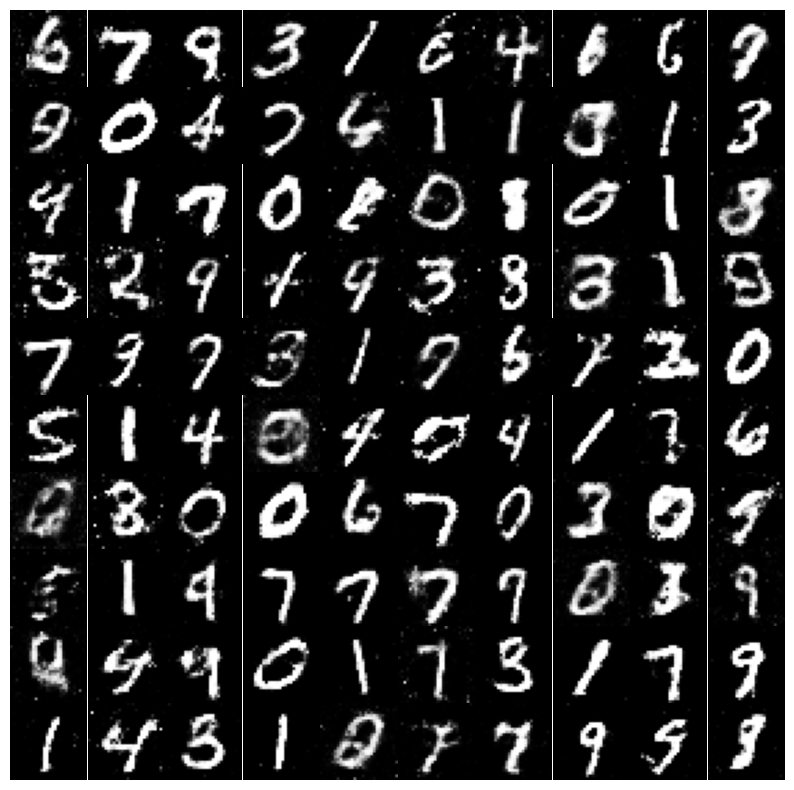

In [14]:

for epoch in range(num_epochs+1):
    # Initialize counters for accuracy calculation
    correct_real = 0
    correct_fake = 0
    total_real = 0
    total_fake = 0

    for i, (imgs, _) in enumerate(train_loader):
        imgs = imgs.to(device)

        # Ground truths: labels for real (1) and fake (0)
        valid = torch.ones(imgs.size(0), 1, device=device, dtype=torch.float)
        fake = torch.zeros(imgs.size(0), 1, device=device, dtype=torch.float)

        # Generate fake images from random noise
        z = torch.randn(imgs.size(0), latent_dim, device=device)
        gen_imgs = generator(z)

        # Discriminator predictions
        real_pred = discriminator(imgs)
        fake_pred = discriminator(gen_imgs.detach())

        # Compute accuracy for real images
        real_pred_labels = (real_pred >= 0.5).float()  # Binary prediction (0 or 1)
        correct_real += (real_pred_labels == valid).sum().item()
        total_real += real_pred_labels.size(0)

        # Compute accuracy for fake images
        fake_pred_labels = (fake_pred < 0.5).float()  # Binary prediction (0 or 1)
        correct_fake += (fake_pred_labels == fake).sum().item()
        total_fake += fake_pred_labels.size(0)

        # Backpropagation for Discriminator
        optimizer_D.zero_grad()
        (adversarial_loss(real_pred, valid) + adversarial_loss(fake_pred, fake) / 2).backward()
        optimizer_D.step()

        # Train Generator
        optimizer_G.zero_grad()
        adversarial_loss(discriminator(gen_imgs), valid).backward()
        optimizer_G.step()

    # Compute and print accuracy for the whole epoch
    d_accuracy_real = correct_real / total_real if total_real > 0 else 0
    d_accuracy_fake = correct_fake / total_fake if total_fake > 0 else 0
    d_accuracy = (d_accuracy_real + d_accuracy_fake) / 2

    print(f"Epoch [{epoch}/{num_epochs}] - Discriminator Accuracy: {d_accuracy:.4f}")

    # Print progress
    if epoch % 10 == 0:
        generate_and_save_images(generator, epoch, latent_dim)

    #print(f"Epoch [{epoch}/{num_epochs}]   Loss D: {d_loss.item():.4f}, Loss G: {g_loss.item():.4f}, D Accuracy (Real): {d_accuracy_real:.4f}, D Accuracy (Fake): {d_accuracy_fake:.4f}, D Accuracy (Overall): {d_accuracy:.4f}")



### Save the Trained Generator and Discriminator Models

In [15]:
torch.save(generator.state_dict(), 'G.pkl')
torch.save(discriminator.state_dict(), 'D.pkl')

print("Generator and Discriminator models have been saved as G.pkl and D.pkl")

Generator and Discriminator models have been saved as G.pkl and D.pkl


In [16]:
import os
import torch
from torchvision.utils import save_image

### create Fake Dataset directory

In [17]:
import shutil
# Define the directory path
dir_path = 'Fake_Digits'

# Check if the directory exists
if os.path.exists(dir_path):
    # Delete the directory and its contents
    shutil.rmtree(dir_path)

In [18]:
# Create the Fake_Digits directory if it doesn't exist
if not os.path.exists('Fake_Digits'):
    os.makedirs('Fake_Digits')

### Create fake dataset

In [19]:
def create_fake_dataset(generator, latent_dim, num_images=999, folder='Fake_Digits'):
    generator.eval()  # Set the generator to evaluation mode


    for i in range(num_images):
        index_str = f"{i:03d}"
        # Generate a random latent vector
        z = torch.randn(1, latent_dim, device=device)
        # Generate a fake image
        gen_img = generator(z)

        # Ensure the generated images are recognizable; optionally add a filter
        # For simplicity, we'll assume all generated images are recognizable
        # Save the image
        save_image(gen_img, os.path.join(folder, f"{index_str}.png"))

        # Save the corresponding latent vector to a text file
        latent_vector = z.cpu().numpy().flatten()
        latent_file_path = os.path.join(folder, f"{index_str}.txt")
        np.savetxt(latent_file_path, latent_vector, fmt='%f')

    print(f"{num_images} fake images and latent vectors have been saved in the '{folder}' folder.")

# Generate and save 100 fake images
create_fake_dataset(generator, latent_dim)

999 fake images and latent vectors have been saved in the 'Fake_Digits' folder.


### Evaluate the Generated Dataset Using a CNN Classifier

In [20]:
# Define a simple CNN classifier for MNIST
class CNNClassifier(nn.Module):
    def __init__(self):
        super(CNNClassifier, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten(),
            nn.Linear(64 * 7 * 7, 128),
            nn.ReLU(),
            nn.Linear(128, 10)  # Output layer for 10 classes (0-9 digits)
        )

    def forward(self, x):
        return self.model(x)

In [21]:
# Initialize the CNN classifier
classifier = CNNClassifier().to(device)

In [22]:
# Loss and optimizer for the classifier
criterion = nn.CrossEntropyLoss()
optimizer_C = optim.Adam(classifier.parameters(), lr=lr)

#### Train the CNN classifier on the real MNIST dataset

In [23]:
def train_classifier(classifier, criterion, optimizer, train_loader, epochs=5):
    classifier.train()

    for epoch in range(epochs):
        # Initialize counters for accuracy calculation
        correct = 0
        total = 0

        for i, (imgs, labels) in enumerate(train_loader):
            imgs, labels = imgs.to(device), labels.to(device)

            # Forward pass
            outputs = classifier(imgs)
            loss = criterion(outputs, labels)

            # Backward pass and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            # Compute accuracy
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            if i % 100 == 0:
                print(f"Epoch [{epoch+1}/{epochs}] Batch {i}/{len(train_loader)} Loss: {loss.item():.4f}")

        # Compute and print the accuracy for this epoch
        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{epochs}] Training Accuracy: {accuracy:.4f}")



In [24]:
# Train the classifier for 5 epochs
train_classifier(classifier, criterion, optimizer_C, train_loader, epochs=10)

Epoch [1/10] Batch 0/469 Loss: 2.3023
Epoch [1/10] Batch 100/469 Loss: 0.5112
Epoch [1/10] Batch 200/469 Loss: 0.3313
Epoch [1/10] Batch 300/469 Loss: 0.2627
Epoch [1/10] Batch 400/469 Loss: 0.1938
Epoch [1/10] Training Accuracy: 0.8831
Epoch [2/10] Batch 0/469 Loss: 0.0715
Epoch [2/10] Batch 100/469 Loss: 0.0449
Epoch [2/10] Batch 200/469 Loss: 0.0985
Epoch [2/10] Batch 300/469 Loss: 0.0933
Epoch [2/10] Batch 400/469 Loss: 0.1007
Epoch [2/10] Training Accuracy: 0.9698
Epoch [3/10] Batch 0/469 Loss: 0.0600
Epoch [3/10] Batch 100/469 Loss: 0.0276
Epoch [3/10] Batch 200/469 Loss: 0.0510
Epoch [3/10] Batch 300/469 Loss: 0.1053
Epoch [3/10] Batch 400/469 Loss: 0.0884
Epoch [3/10] Training Accuracy: 0.9794
Epoch [4/10] Batch 0/469 Loss: 0.0780
Epoch [4/10] Batch 100/469 Loss: 0.1090
Epoch [4/10] Batch 200/469 Loss: 0.0410
Epoch [4/10] Batch 300/469 Loss: 0.0106
Epoch [4/10] Batch 400/469 Loss: 0.1224
Epoch [4/10] Training Accuracy: 0.9833
Epoch [5/10] Batch 0/469 Loss: 0.0265
Epoch [5/10] B

In [25]:
# Save the trained classifier model
torch.save(classifier.state_dict(), 'C.pkl')
print("Classifier model has been saved as C.pkl")

Classifier model has been saved as C.pkl


In [26]:
output_base_dir = 'Fake_Digits'

In [27]:
# Create output directories for each class if they don't exist
for i in range(10):
    os.makedirs(os.path.join(output_base_dir, str(i)), exist_ok=True)

In [28]:


from PIL import Image

# Generate images, classify, and move them
for filename in os.listdir(output_base_dir):
    if filename.endswith('.png') or filename.endswith('.jpg'):  # Adjust based on your image formats
        image_path = os.path.join(output_base_dir, filename)

        # Generate a latent vector and create an image using the generator
        z = torch.randn(1, latent_dim).to(device)  # Random latent vector
        with torch.no_grad():
            generated_image = generator(z)

        # If you want to save or visualize the generated image:
        # Convert the generated image to a PIL Image (assuming grayscale output)
        generated_image_pil = transforms.ToPILImage()(generated_image.squeeze(0).cpu())

        # Optionally save generated images for inspection
        generated_image_pil.save(os.path.join(output_base_dir, f"generated_{filename}"))

        # Open the original image in grayscale mode before transforming and classifying
        original_image = Image.open(image_path).convert("L")  # Convert to grayscale
        transformed_image = transform(original_image).unsqueeze(0).to(device)

        with torch.no_grad():
            outputs = classifier(transformed_image)
            _, predicted = torch.max(outputs, 1)
            class_label = predicted.item()

        # Define the destination path for the original image
        dest_folder = os.path.join(output_base_dir, str(class_label))
        if not os.path.exists(dest_folder):
            os.makedirs(dest_folder)
        dest_image_path = os.path.join(dest_folder, filename)

        # Move the original image
        shutil.move(image_path, dest_image_path)

        # # Save the classification result to a .txt file
        # txt_filename = os.path.splitext(filename)[0] + '.txt'
        # txt_file_path = os.path.join(dest_folder, txt_filename)
        # with open(txt_file_path, 'w') as f:
        #     f.write(f'Classified as: {class_label}\n')


#### Evaluate the Classifier on Real (S0) and Fake (S1) Datasets

In [29]:
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

In [30]:
# Function to load a dataset from a folder
def load_dataset_from_folder(folder, transform=ToTensor(), batch_size=100):
    dataset = ImageFolder(root=folder, transform=transform)
    loader = DataLoader(dataset, batch_size=batch_size, shuffle=False)
    return loader


In [31]:
# Load 100 random real MNIST images as S0
test_loader = DataLoader(datasets.MNIST(root='./data', train=False, transform=transform),
                         batch_size=100, shuffle=True)

fake_transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=1),  # Convert to grayscale
    transforms.Resize((28, 28)),                 # Ensure the size matches
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# # Load the fake images from the 'Fake_Digits' folder as S1
# fake_loader = ImageFolder(root='Fake_Digits', transform=fake_transform)
# Load the fake images from the 'Fake_Digits' folder
fake_dataset = ImageFolder(root='Fake_Digits', transform=fake_transform)
fake_loader = DataLoader(
    fake_dataset,
    batch_size=100,  # Ensure this matches the batch size of test_loader
    shuffle=False   # You can set this to True if you want shuffling
)

### Accuracy of Test Dataset

In [32]:
def evaluate_classifier_accuracy(classifier, test_loader):
    classifier.eval()  # Set the model to evaluation mode
    correct = 0
    total = 0

    with torch.no_grad():  # Disable gradient calculation
        for imgs, labels in test_loader:
            imgs, labels = imgs.to(device), labels.to(device)

            # Forward pass
            outputs = classifier(imgs)
            _, predicted = torch.max(outputs, 1)  # Get the index of the max log-probability
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    # Compute accuracy
    accuracy = correct / total
    print(f"Testing Accuracy: {accuracy:.4f}")

In [33]:
# Evaluate the classifier on the test dataset
evaluate_classifier_accuracy(classifier, test_loader)

Testing Accuracy: 0.9873


#### Function to evaluate classifier and report error rate

In [34]:
# def evaluate_classifier(classifier, data_loader, is_fake=False):
#     classifier.eval()
#     correct = 0
#     total = 0
#     with torch.no_grad():
#         for images, labels in data_loader:
#             images = images.to(device)
#             labels = labels.to(device)  # Ensure labels are moved to the correct device
#             outputs = classifier(images)
#             _, predicted = torch.max(outputs, 1)

#             if is_fake:
#                 # Handle fake data appropriately; possibly skip accuracy calculation
#                 continue
#             else:
#                 total += labels.size(0)
#                 correct += (predicted == labels).sum().item()

#     if not is_fake:
#         error_rate = 1 - (correct / total)
#         dataset_type = "Real (S0)"
#         print(f"Classification error rate for {dataset_type} dataset: {error_rate:.2f}")
#         return error_rate
#     else:
#         print("Fake dataset accuracy calculation skipped.")
#         return None

def evaluate_classifier(classifier, data_loader):
    classifier.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in data_loader:
            images = images.to(device)
            labels = labels.to(device)  # Ensure labels are moved to the correct device
            outputs = classifier(images)
            _, predicted = torch.max(outputs, 1)

            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    error_rate = 1 - (correct / total)
    dataset_type = "Real (S0)"
    print(f"Classification error rate for {dataset_type} dataset: {error_rate:.2f}")
    return error_rate


In [35]:
# Evaluate on real dataset (S0)
error_S0 = evaluate_classifier(classifier, test_loader)


Classification error rate for Real (S0) dataset: 0.01


In [36]:
test_loader

In [37]:
def evaluate_classifier_fake(classifier, data_loader):
  classifier.eval()
  correct = 0
  total = 0
  with torch.no_grad():
      for data in data_loader:
          images = data[0].to(device)  # For fake data, assume only images
          labels = torch.randint(0, 10, (images.size(0),)).to(device)  # Fake labels for S1


          outputs = classifier(images)
          _, predicted = torch.max(outputs, 1)

          total += labels.size(0)
          correct += (predicted == labels).sum().item()

  error_rate = 1- (correct / total)
  dataset_type = "Fake (S1)"

  return error_rate


In [42]:
# Evaluate on fake dataset (S1)
error_S1 = evaluate_classifier_fake(classifier, fake_loader)

Classification error rate for Fake (S1) dataset: 0.97


In [43]:
def check_loader_dimensions(data_loader, is_fake=False):
    # Iterate through the data loader
    for i, data in enumerate(data_loader):
        if is_fake:
            # If it's the fake loader, assume there are no true labels, just images
            images = data[0]  # Get images
            print(f"Batch {i+1} - Images shape: {images.shape}")
        else:
            # For real data, both images and labels are expected
            images, labels = data
            print(f"Batch {i+1} - Images shape: {images.shape}, Labels shape: {labels.shape}")
        # Stop after the first batch to avoid printing too much
        break


In [44]:
# Check dimensions in the fake loader
check_loader_dimensions(fake_loader, is_fake=True)

Batch 1 - Images shape: torch.Size([100, 1, 28, 28])


In [45]:
# Check dimensions in the fake loader
check_loader_dimensions(test_loader, is_fake=True)

Batch 1 - Images shape: torch.Size([100, 1, 28, 28])


In [46]:
import zipfile
import os

# Define the paths to include in the zip file
files_to_include = ['G.pkl', 'D.pkl', 'C.pkl']
directory_to_include = 'Fake_Digits'

# Name your zip file (replace with your required format)
zip_filename = '200160R_AADS_Eranda.zip'

# Create a zip file
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add individual files
    for file in files_to_include:
        if os.path.exists(file):
            zipf.write(file)
        else:
            print(f"File {file} not found!")

    # Add all files from the directory
    for foldername, subfolders, filenames in os.walk(directory_to_include):
        for filename in filenames:
            file_path = os.path.join(foldername, filename)
            zipf.write(file_path)

print(f'{zip_filename} created successfully!')


200160R_AADS_Eranda.zip created successfully!
